<a href="https://colab.research.google.com/github/choki0715/UnLiteFlowNet-PIV/blob/master/NIA95_AIDEN_%EC%83%81%EC%B7%A8%EC%9B%90_%EC%9B%90%EC%B2%9C%EB%8D%B0%EC%9D%B4%ED%84%B0_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 불러오기
#import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm # 그래프 한글 font 로딩.

import numpy as np
import pandas as pd
import glob
#from sklearn.model_selection import train_test_split  # <- split 사용 확인 필요.
import time
from datetime import datetime
import unicodedata  #<---------- 유니코드 문자열 정의 모듈. : 필요한지 확인 필요.
#import re           #<---------- 정규식처리를 위한 모듈 : 필요한지 확인 필요. 
import os 
import io
import seaborn as sns
import IPython
import IPython.display
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['axes.grid'] = False

# -*- coding: utf-8 -*-

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df_wl = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/관측소1개_샘플(20220914)/국가_수위_241.csv', encoding='cp949')
# df_wq = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/관측소1개_샘플(20220914)/국가_수질_241.csv', encoding='cp949')

# df_wq_10p = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/1cycle_수집_(10%)/국가_수질_데이터셋.zip (Unzipped Files)/국가_수질_가평가평_2224.csv', encoding='cp949')

# df_sfw_namkang = pd.read_csv('/content/drive/MyDrive/NIA_AIDEN_01_(상-취수원)/비전21테크_10%데이터 남강,영천(20220914)/³²°­´ï_2020_110_3689280.csv', header = 1) #, encoding='cp949')
in_path = '/content/drive/MyDrive/NIA_AIDEN_02_(상-취수원)/month_11_new_meta/Type-1 (2022-11-10)/112/csv/done/'

### Here file name !!!!!!!!
input_file = 'AI_095-1_112_B039_5m.csv'
#data = pd.read_csv(in_path + input_file, header = 1, encoding='cp949')
data = pd.read_csv(in_path + input_file)
data

,measure_id,measure_date,turbidity,EC,pH,water_temp,DO,TOC,algae,alkalinity,...,cryptophyceae,2-MIB,Geosmin,synedra,T-N,T-P,Mn,temp,precipitation,wind_velocity
0,B039,2020-12-31 23:55,11.26,0.35,88.02,1.94,0.160000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.036,NaN,-8.86,0.0,0.00
1,B039,2021-01-01 0:00,11.26,0.35,87.96,1.91,0.159296,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.036,NaN,-9.18,0.0,0.00
2,B039,2021-01-01 0:05,11.24,0.35,87.92,1.90,0.158592,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.036,NaN,-9.22,0.0,0.04
3,B039,2021-01-01 0:10,11.18,0.35,87.92,1.89,0.157887,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.036,NaN,-9.08,0.0,0.00
4,B039,2021-01-01 0:15,11.21,0.35,87.88,1.88,0.157183,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.036,NaN,-8.94,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166928,B039,2022-08-03 14:35,1.48,345.64,7.59,24.65,7.540000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.053,NaN,31.32,0.0,1.60
166929,B039,2022-08-03 14:40,1.47,345.34,7.59,24.69,7.550000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.053,NaN,31.72,0.0,2.30
166930,B039,2022-08-03 14:45,1.47,345.23,7.59,24.68,7.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.053,NaN,31.74,0.0,1.32
166931,B039,2022-08-03 14:50,1.44,344.97,7.59,24.68,7.440000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.053,NaN,31.36,0.0,0.64


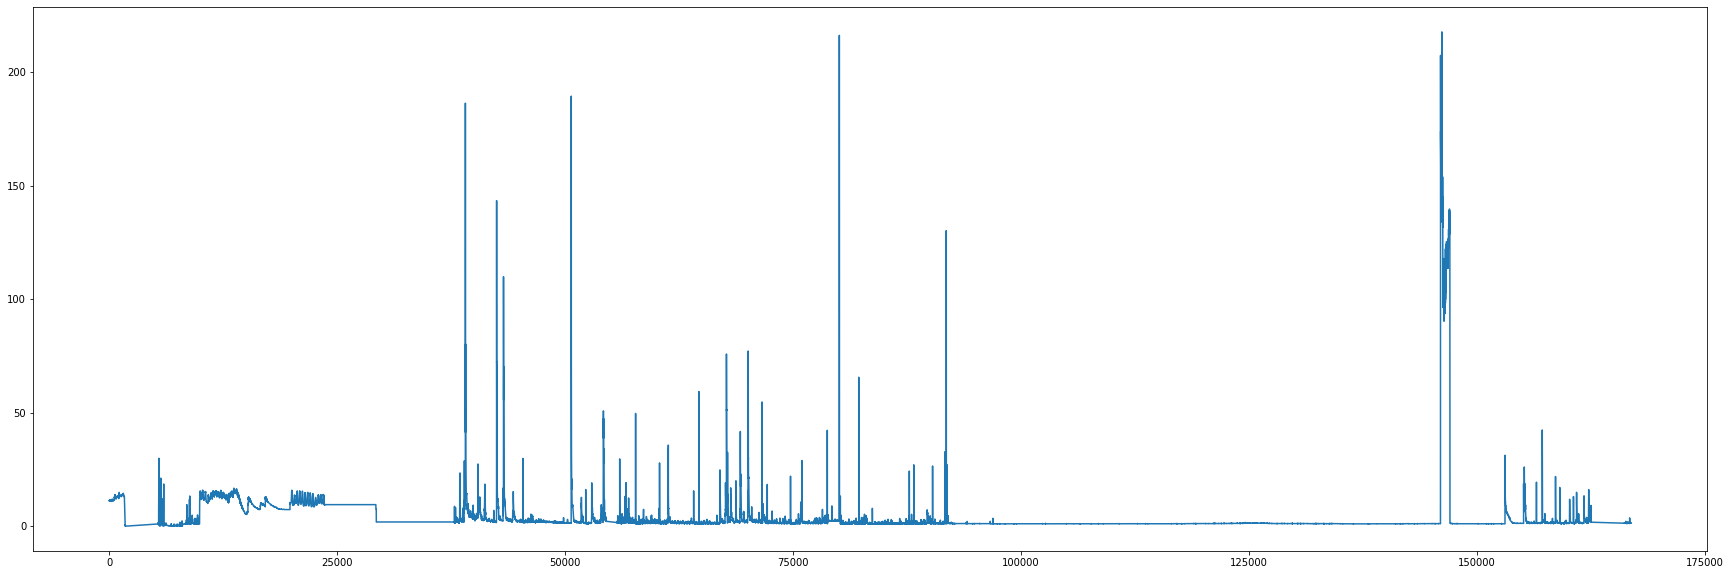

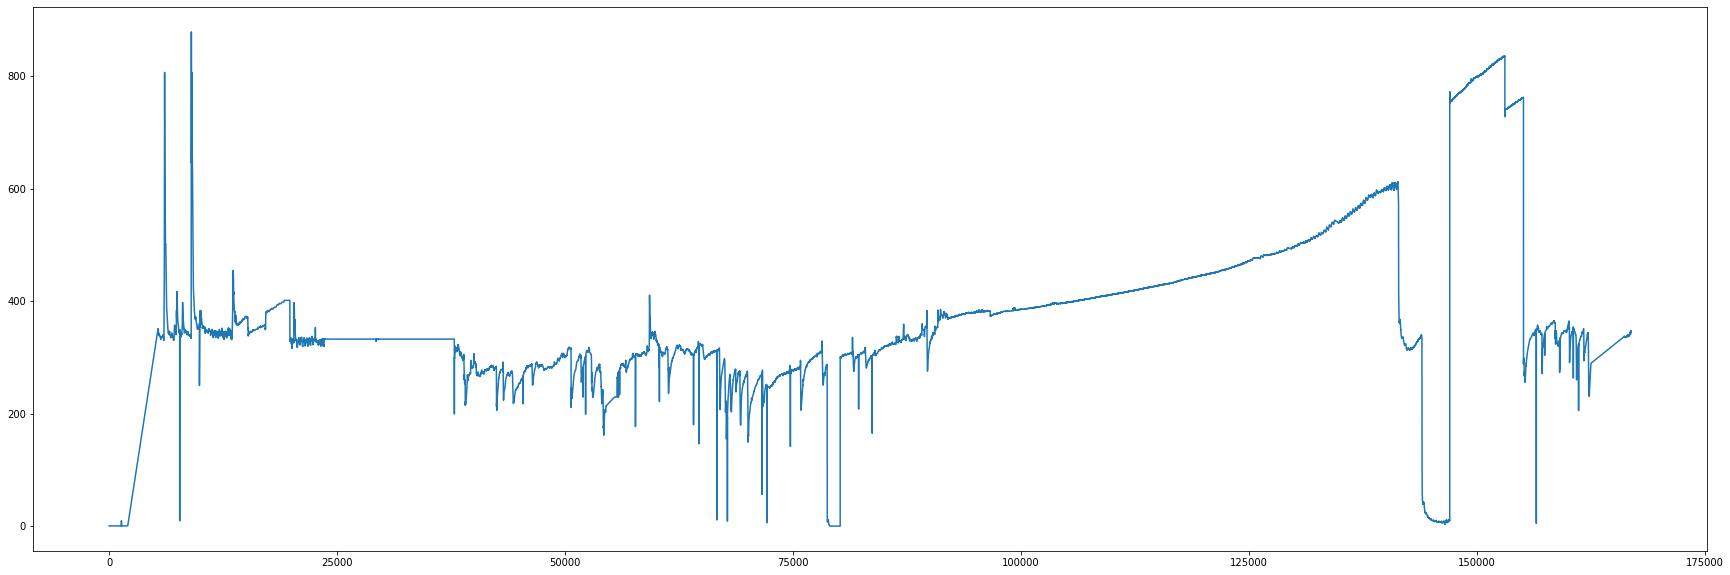

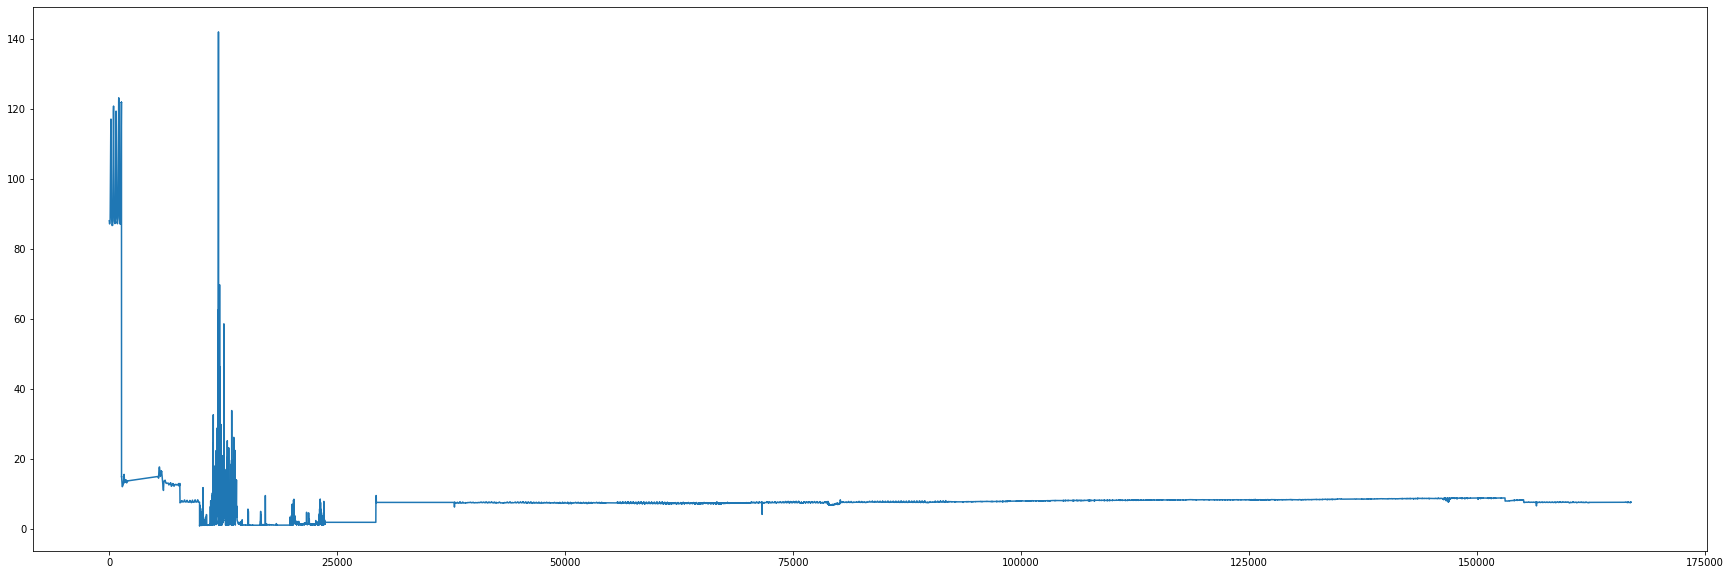

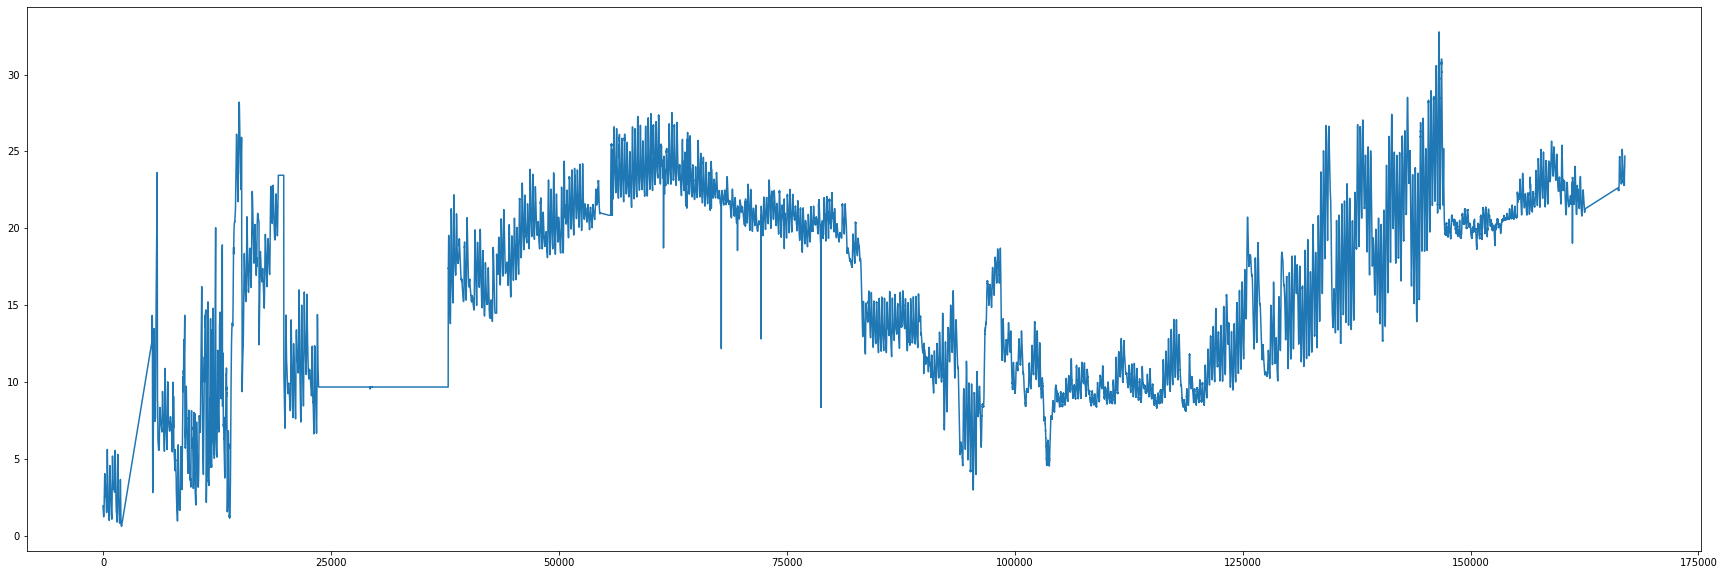

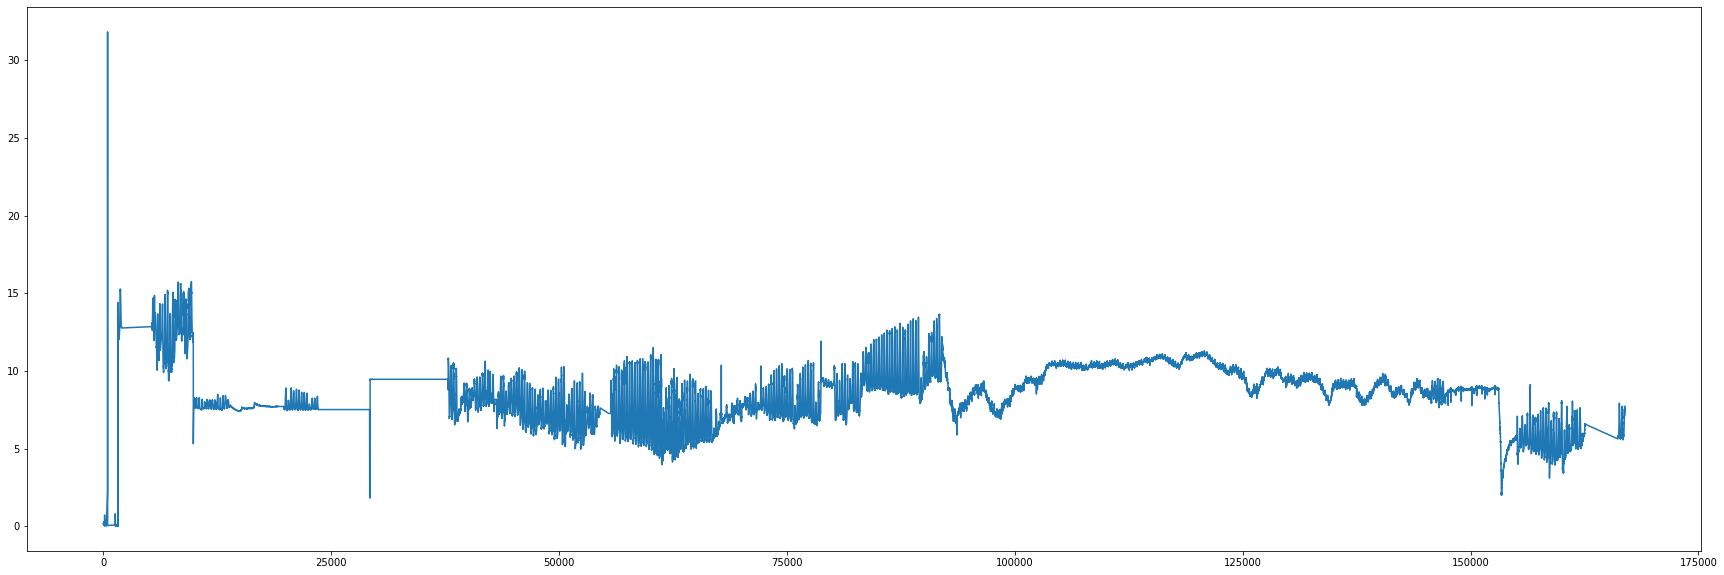

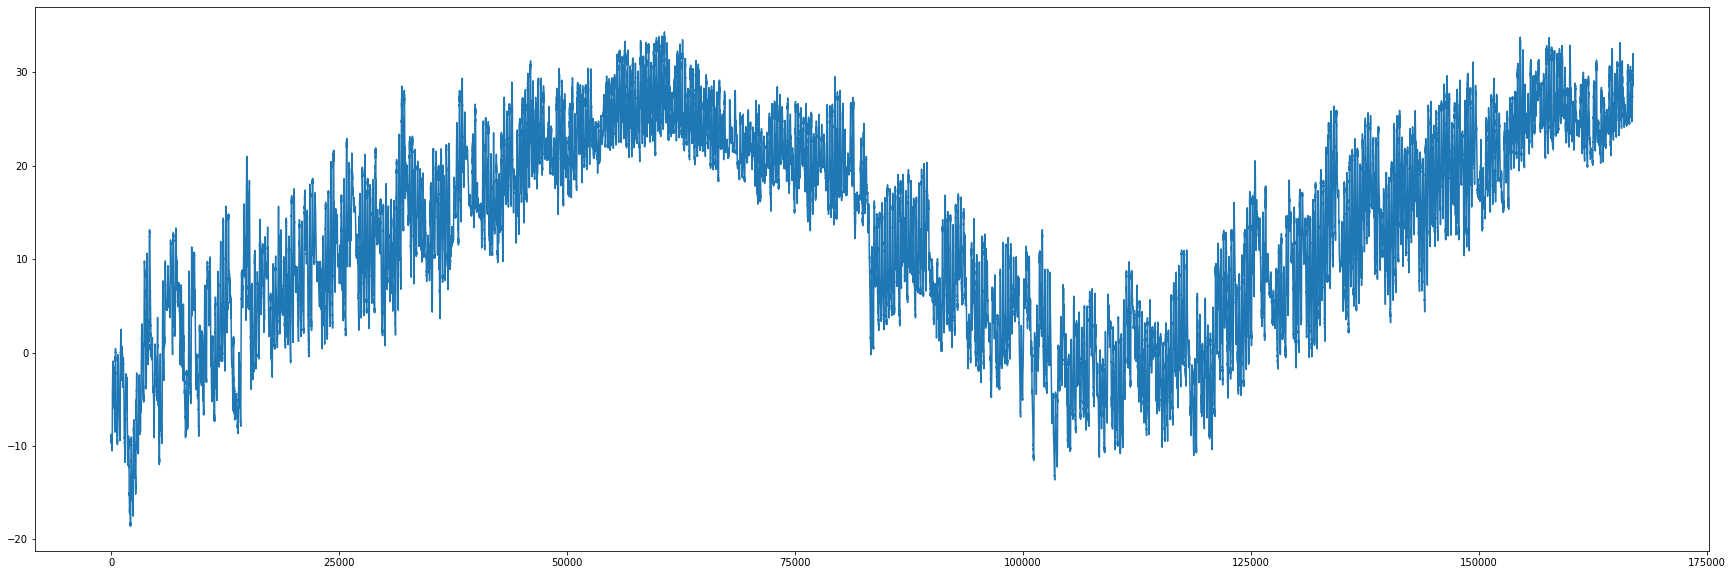

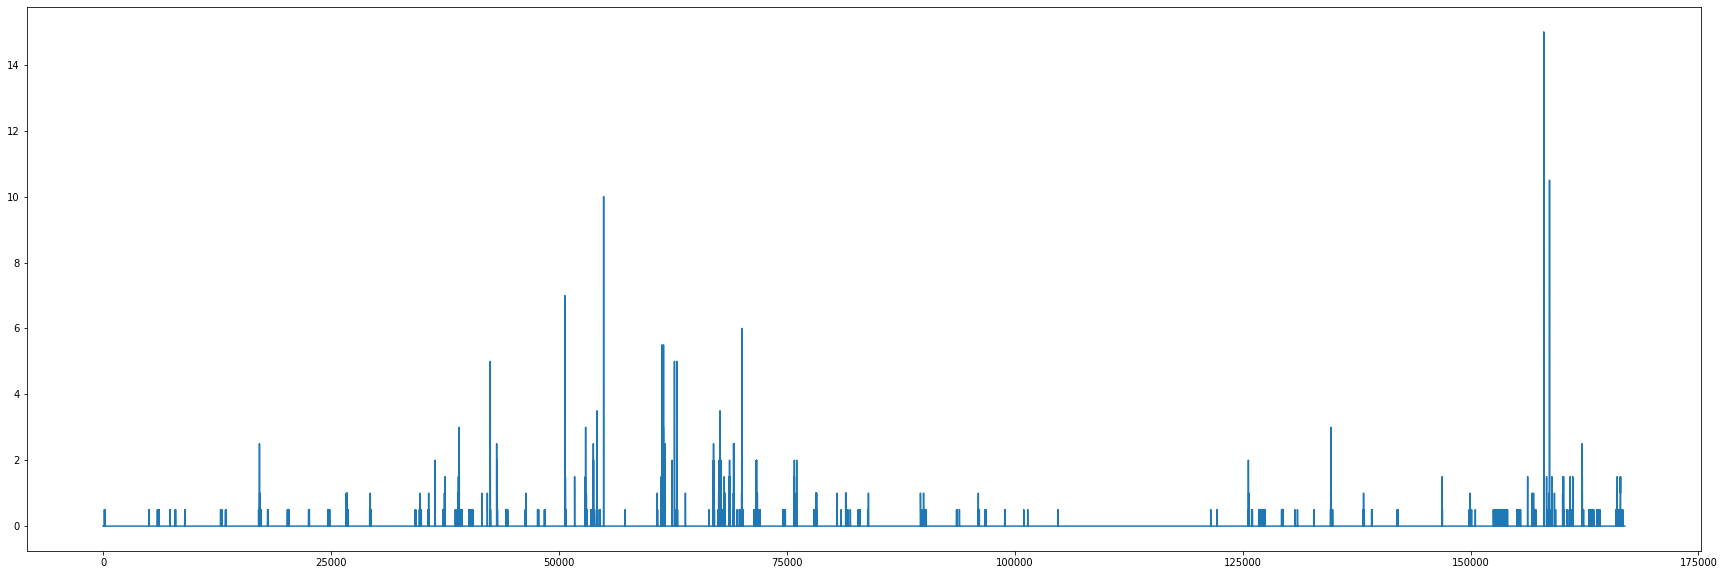

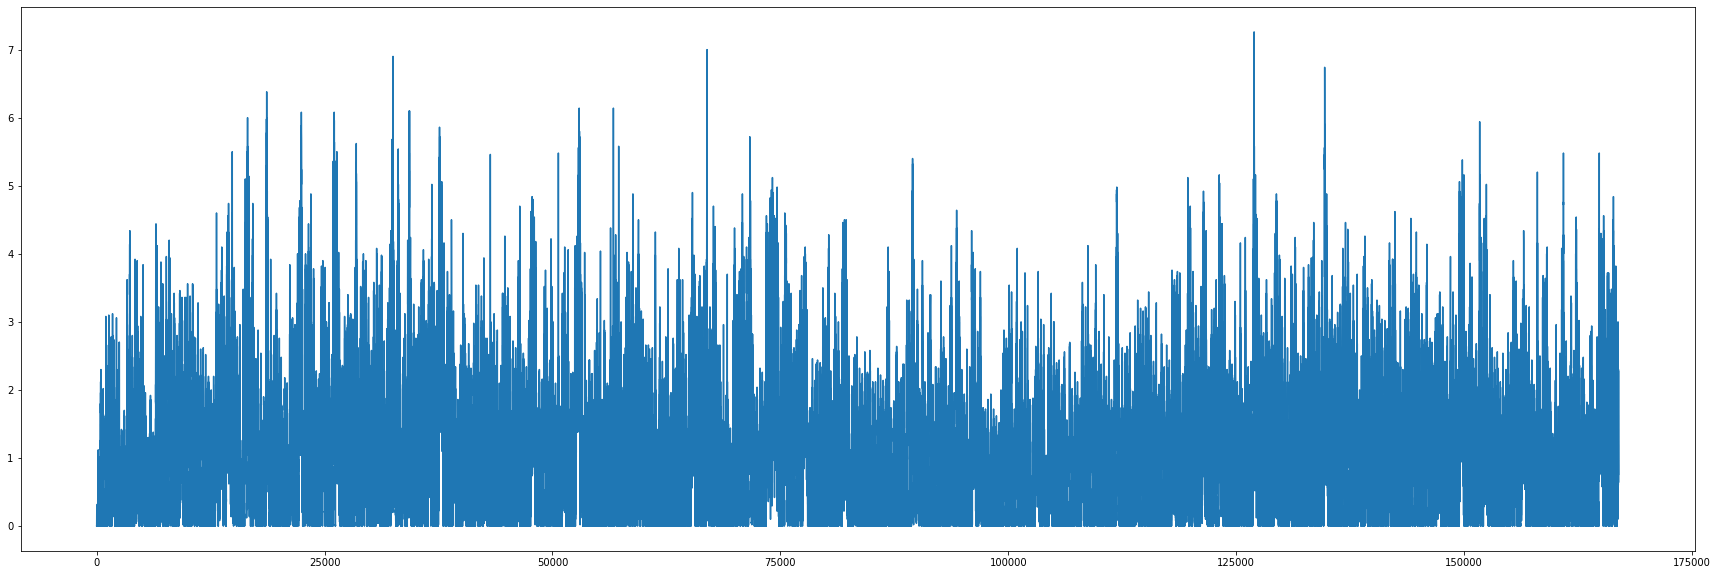

In [ ]:

features = ['turbidity',	'EC',	'pH', 'water_temp',	'DO', 'temp',	'precipitation',	'wind_velocity']
my_data = data[features]

### Heer saving directory !!!
creation_date = '_20221103_'
file_loc = '/content/drive/MyDrive/NIA_AIDEN_02/Nov/11_3/' 

with open(file_loc + input_file + '_task_summary.txt', 'w') as f:
    num_task = len(data)//2000
    content = "total amount of task %d \n" % num_task
    f.write(content)


### start task 2000 summary
for i in range(len(my_data)//2000):
  start_int = i*2000
  end_int = (i+1)*2000
  start_str = f'{start_int}'
  end_str = f'{end_int}'
  surfix = start_str + '_' + end_str + '.xlsx'
  my_path = file_loc + input_file + creation_date  + surfix
  block2check = my_data.loc[start_int:end_int,]
  my_data.describe().to_excel(my_path)

my_data.describe().to_excel(file_loc + input_file + creation_date  + 'total_summary.xlsx')

 ### start task for figures
 
for ftr in (features):
  plt.rcParams['figure.figsize'] = (30,10)
  fig=my_data[ftr].plot()
  fig = fig.get_figure()
  fig.savefig(file_loc + input_file + creation_date + '_feature_' + ftr + '.jpg')
  plt.show()

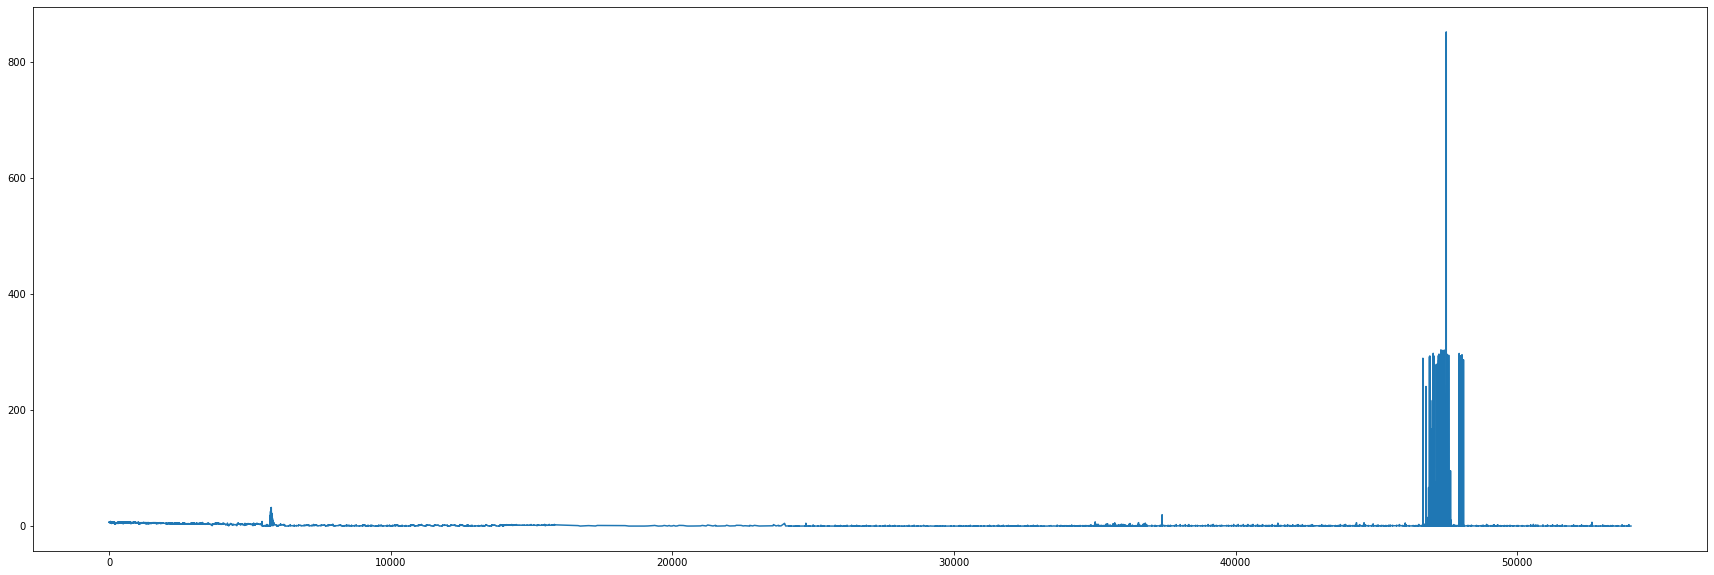

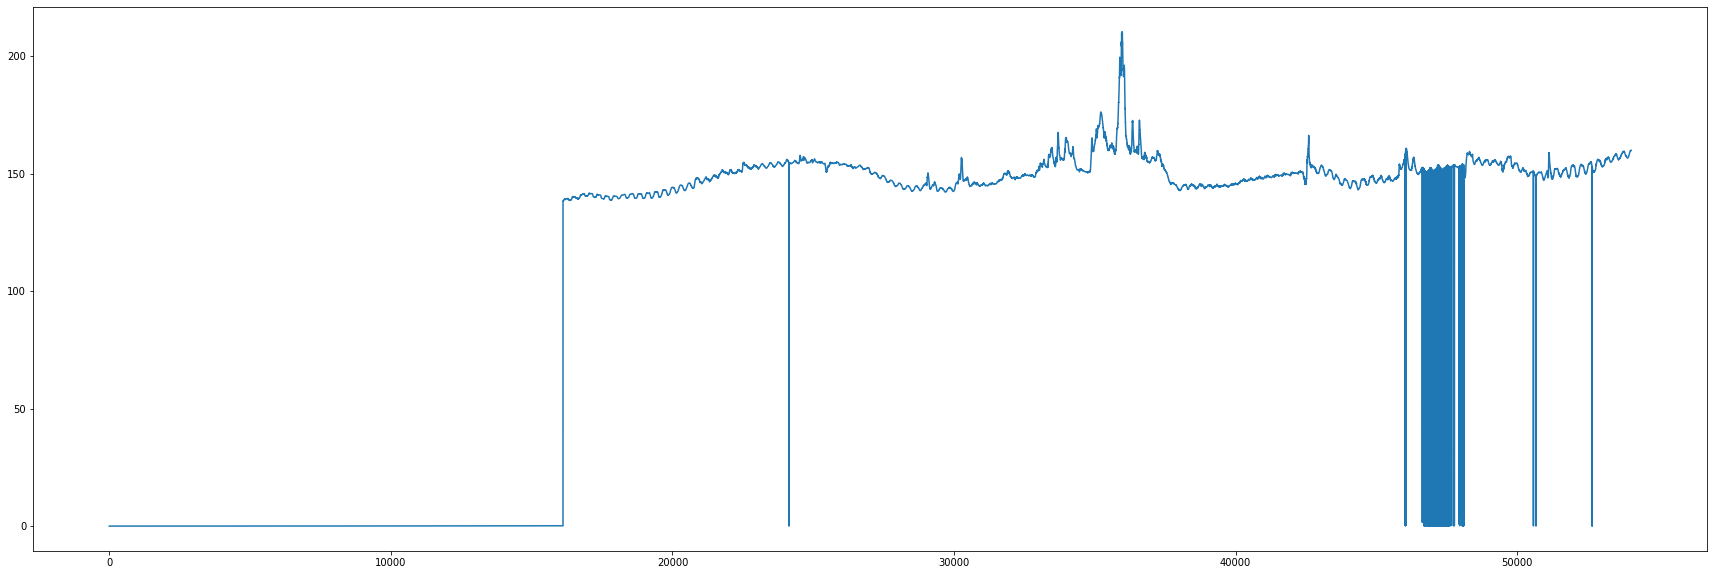

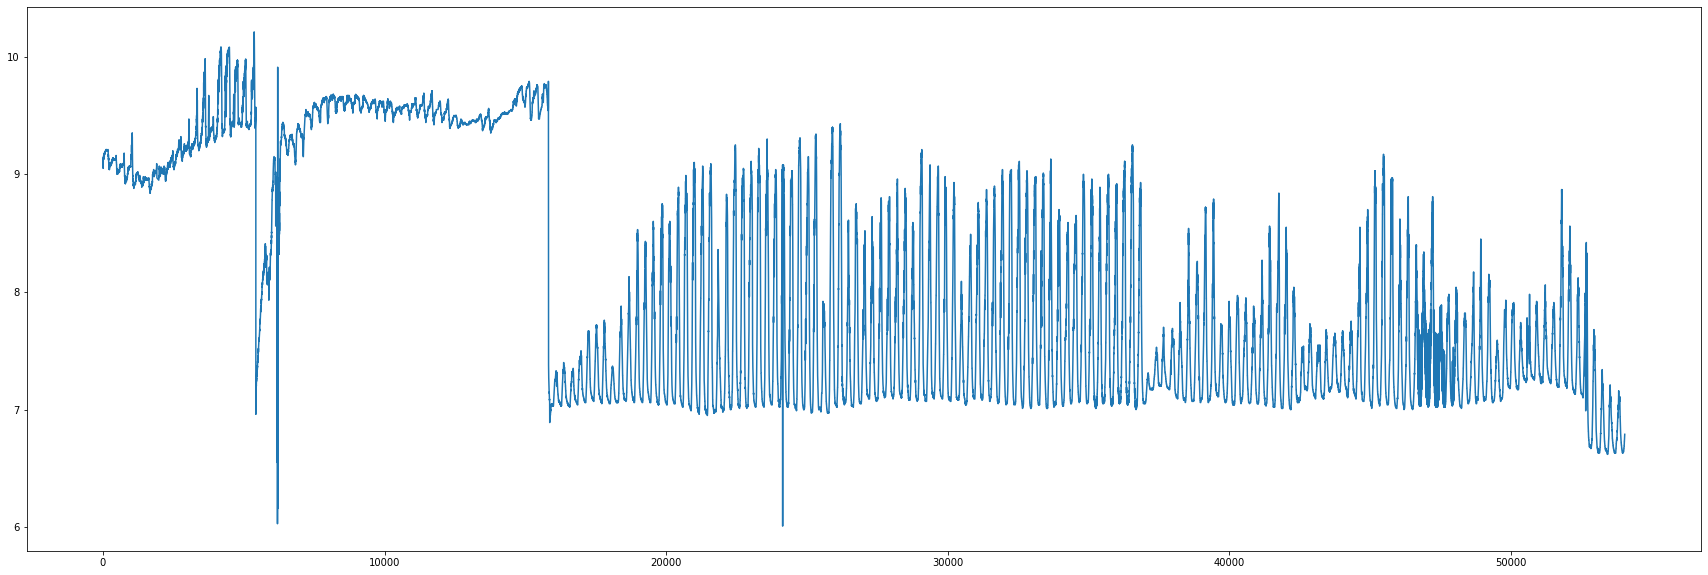

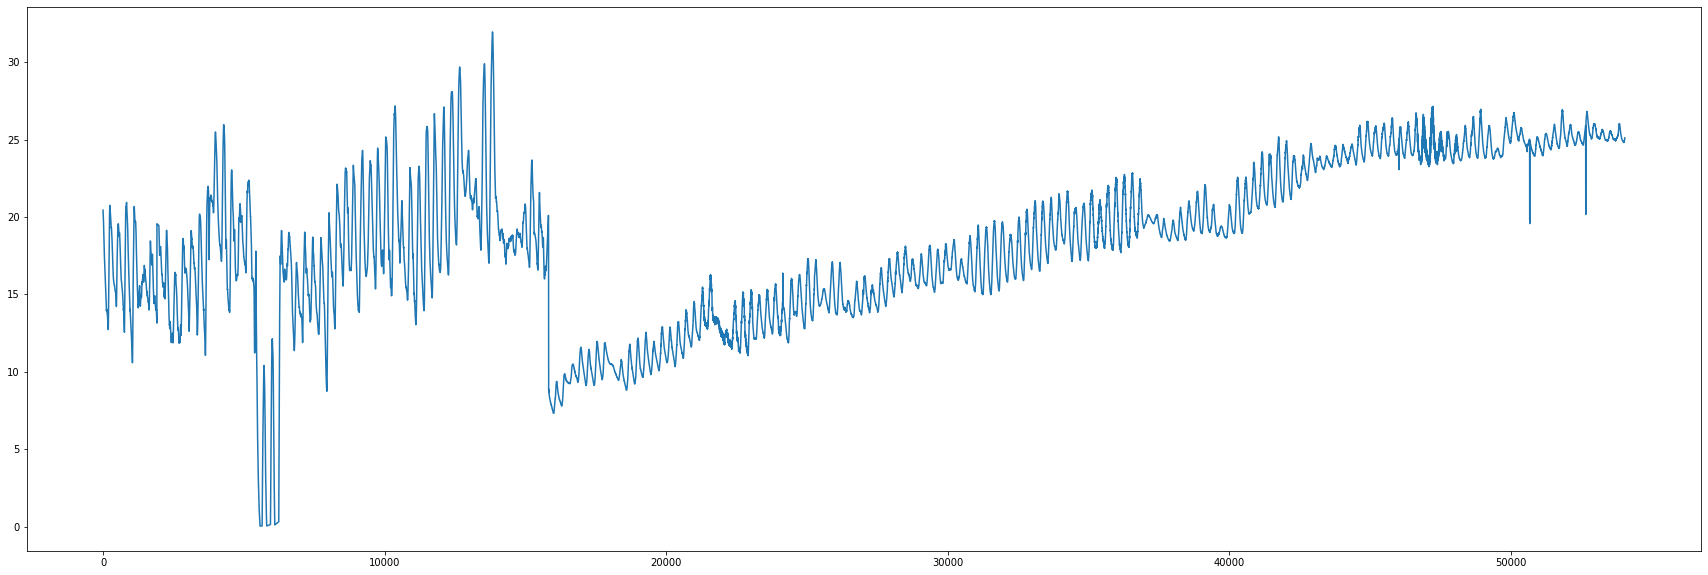

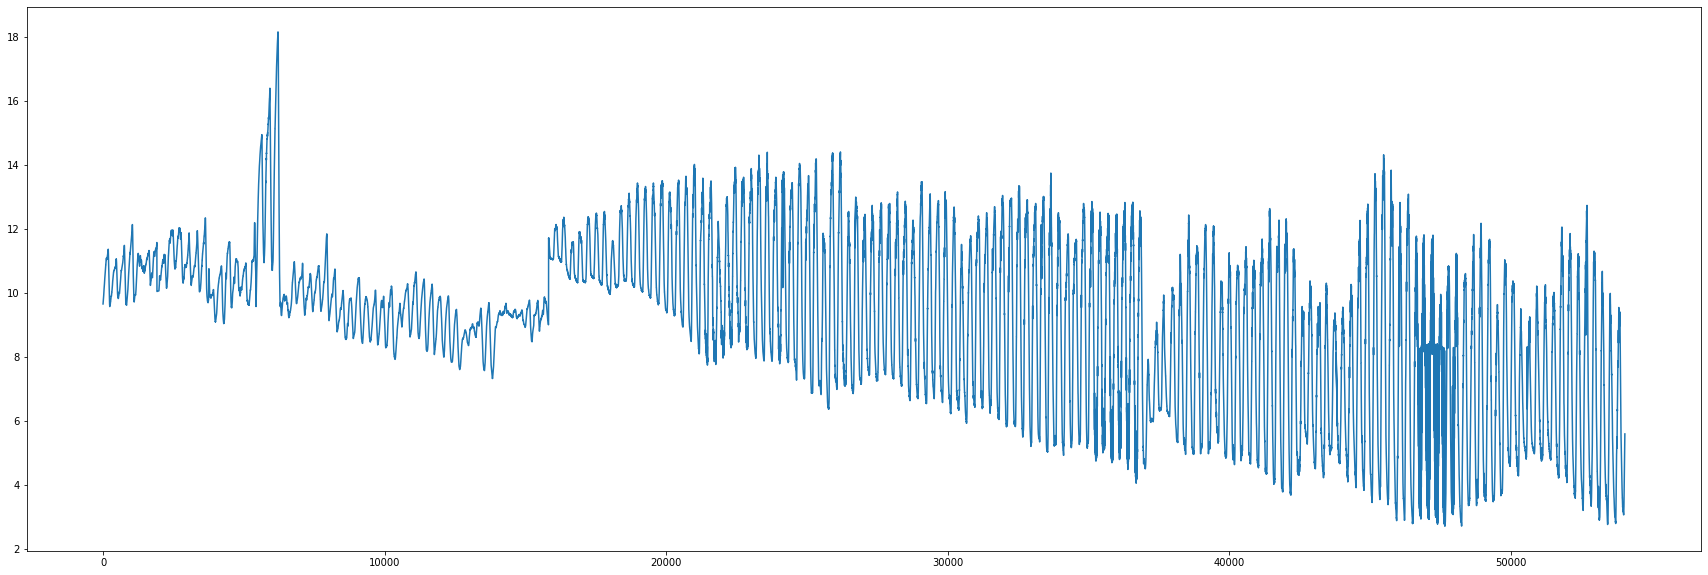

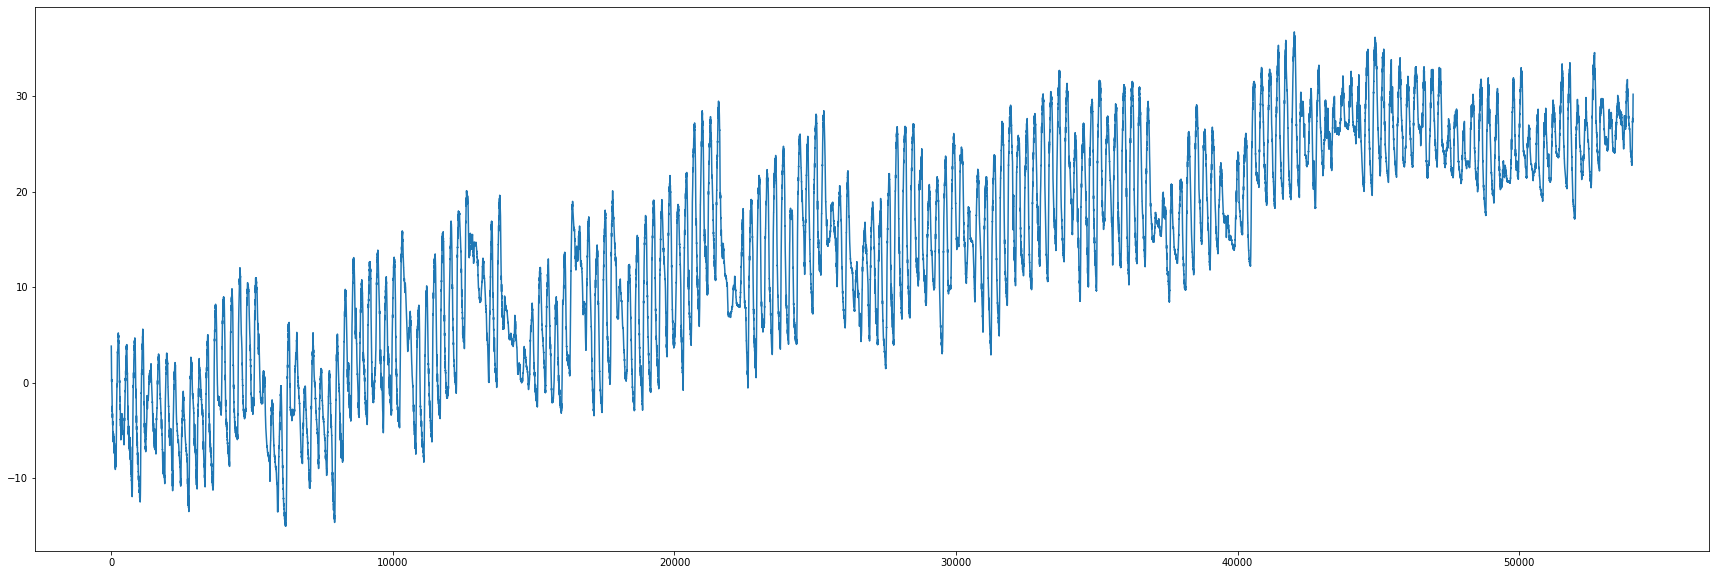

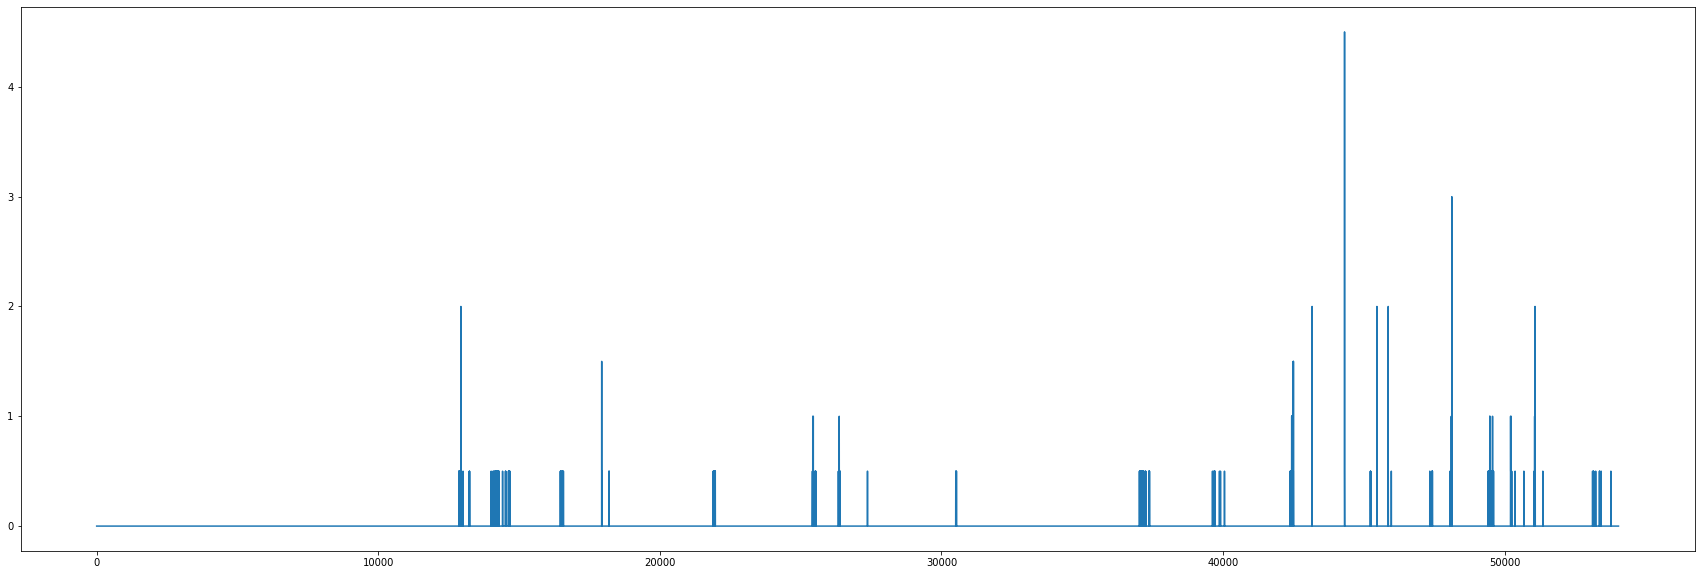

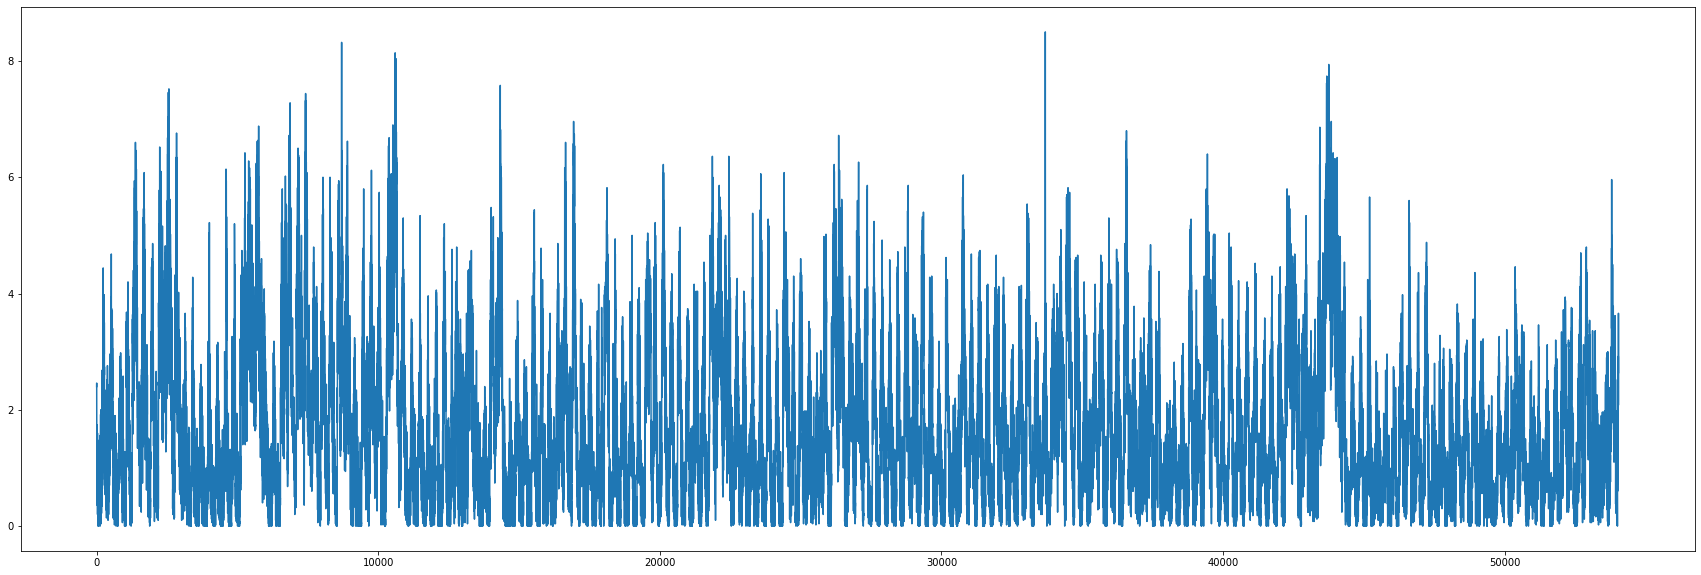

In [ ]:

### start task 2000 summary
for i in range(len(my_data)//2000):
  start_int = i*2000
  end_int = (i+1)*2000
  start_str = f'{start_int}'
  end_str = f'{end_int}'
  surfix = start_str + '_' + end_str + '.xlsx'
  my_path = file_loc + input_file + creation_date  + surfix
  block2check = my_data.loc[start_int:end_int,]
  my_data.describe().to_excel(my_path)

my_data.describe().to_excel(file_loc + input_file + creation_date  + 'total_summary.xlsx')

 ### start task for figures
 
for ftr in (features):
  plt.rcParams['figure.figsize'] = (30,10)
  fig=my_data[ftr].plot()
  fig = fig.get_figure()
  fig.savefig(file_loc + input_file + creation_date + '_feature_' + ftr + '.jpg')
  plt.show()
